In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


In [4]:
# Step 2: Load dataset
df = pd.read_csv(r"C:\Desktop\Oasis Infobyte\spam.csv", encoding='latin-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# Step 3: Clean dataset
# Keep only useful columns (v1 = label, v2 = message)
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Encode labels: ham=0, spam=1
df['label'] = df['label'].map({'ham':0, 'spam':1})

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None


C:\Users\deepu\AppData\Local\Temp\ipykernel_19412\914948348.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'ham':0, 'spam':1})


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Dataset size: (5572, 2)
Class distribution:
 label
0    4825
1     747
Name: count, dtype: int64


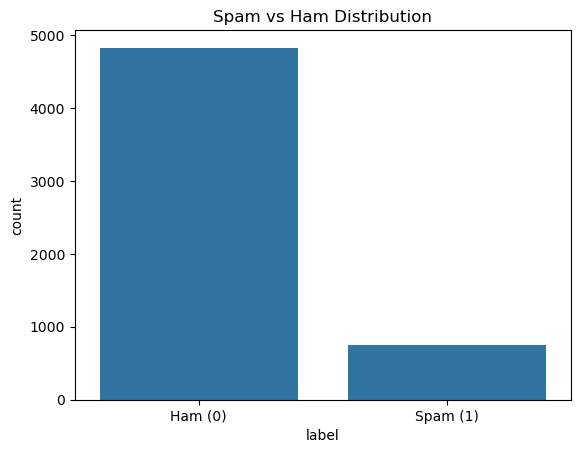

In [7]:
# Step 4: EDA
print("Dataset size:", df.shape)
print("Class distribution:\n", df['label'].value_counts())

# Plot distribution
sns.countplot(x='label', data=df)
plt.xticks([0,1], ['Ham (0)', 'Spam (1)'])
plt.title("Spam vs Ham Distribution")
plt.show()


In [8]:
# Step 5: Split dataset
X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (4457,)
Test size: (1115,)


In [9]:
# Step 6: Convert text to TF-IDF features
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF Matrix Shape:", X_train_tfidf.shape)


TF-IDF Matrix Shape: (4457, 3000)


In [10]:
# Step 7: Train ML models

# 1. Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# 2. Logistic Regression
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_tfidf, y_train)

# 3. Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_tfidf, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [11]:
# Step 8: Evaluate models
models = {'Naive Bayes': nb, 'Logistic Regression': lr, 'Random Forest': rf}

for name, model in models.items():
    print(f"\n===== {name} =====")
    y_pred = model.predict(X_test_tfidf)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



===== Naive Bayes =====
Accuracy: 0.9730941704035875
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.98      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
 [[964   2]
 [ 28 121]]

===== Logistic Regression =====
Accuracy: 0.9730941704035875
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.80      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
 [[966   0]
 [ 30 119]]

===== Random Forest =====
Accuracy: 0.9775784753363229
Classification Report:
               prec

In [12]:
# Step 9: Save the best model (Logistic Regression chosen here)
joblib.dump(lr, "spam_classifier.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
print("Model and vectorizer saved!")


Model and vectorizer saved!


In [13]:
# Step 10: Predict on new messages
example = ["Congratulations! You've won a free iPhone. Click here to claim.",
           "Hi, let's meet tomorrow at the office."]

example_tfidf = tfidf.transform(example)
pred = lr.predict(example_tfidf)

for msg, label in zip(example, pred):
    print(f"Message: {msg} --> {'Spam' if label==1 else 'Ham'}")


Message: Congratulations! You've won a free iPhone. Click here to claim. --> Spam
Message: Hi, let's meet tomorrow at the office. --> Ham
